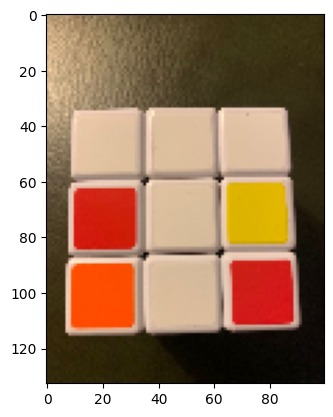

In [14]:
import cv2
import numpy as np

# cv2_imshow was used on Colab
from matplotlib.pyplot import imshow as plt_imshow
def cv2_imshow(img):
    plt_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

root = "../assets/images/"

# Load image and downscale, keeping the aspect ratio
origin = cv2.imread(root+"rubik.jpg")
width = 100
height =int(origin.shape[0]*width/origin.shape[1])
img = cv2.resize(
    origin,
    (width,height)
)
cv2_imshow(img)

Matches
[[ 33  33  33 ... 115 115 115]
 [ 40  41  42 ...  40  41  42]]

73
1075
992
72
Points
[[ 10  35]
 [ 86  34]
 [ 91 111]
 [  7 115]]


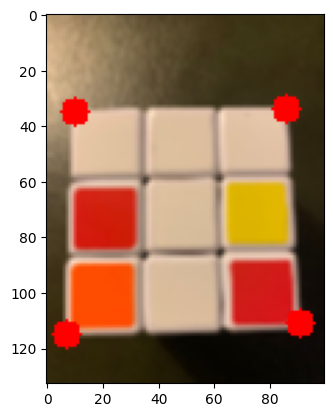

In [15]:
#get the greyscale image 
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#apply the gaussian blur to uniform the color of the pixels
img = cv2.GaussianBlur(img,(3,3),0)
#detect the edges of the image
edges = cv2.Canny(img,100,200)

cv2_imshow(edges)

#take x and y coordinates of the withe pixels
white_pixels = np.where(edges == 255)
matches = np.array(white_pixels)
print('Matches')
print(matches)
print()

#find the vertices of the cube's face
top_l_idx = np.argmin(matches[0] + matches[1])
print(top_l_idx)
bott_l_idx = np.argmax(matches[0] - matches[1])
print(bott_l_idx)
bott_r_idx = np.argmax(matches[0] + matches[1])
print(bott_r_idx)
top_r_idx = np.argmax(matches[1] - matches[0])
print(top_r_idx)

#  reverse X and Y of the point
points = np.array([
    matches[:, top_l_idx][::-1],
    matches[:,top_r_idx][::-1],
    matches[:,bott_r_idx][::-1],
    matches[:, bott_l_idx][::-1],
])

print('Points')
print(points)

#show the image obtained with vertices underlined
points_img = img.copy()
for point in points:
    cv2.circle(points_img, point, 5, (0,0,255), -1)
cv2_imshow(points_img)

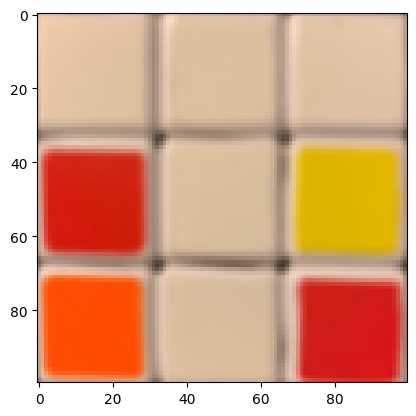

In [16]:
# Apply the trasformation
src_points = np.array(points, dtype=np.float32)
# Destination height is the same as width, because the image is a square (it's a cube...)
dest_points = np.array([
    [ 0, 0 ],
    [ width, 0 ],
    [ width, width ],
    [ 0, width ],
], dtype=np.float32)

match_matrix = cv2.getPerspectiveTransform(src_points, dest_points)

cube_face_img = cv2.warpPerspective(img, match_matrix, (width, width))
cv2_imshow(cube_face_img)

In [17]:
cube_face_hsv = cv2.cvtColor(cube_face_img, cv2.COLOR_BGR2HSV)

In [19]:
cube_face_step = width // 6 # Divide 3x3 face in 6x6 in order to get the center

cube_points = [
    cube_face_hsv[y, x]
    for y in range(cube_face_step, cube_face_hsv.shape[0]-1, cube_face_step*2)
    for x in range(cube_face_step, cube_face_hsv.shape[0]-1, cube_face_step*2)
]

# Ranges of the color to detect in the image
color_ranges = {
    'white':(np.array([0, 0, 200],dtype=np.uint8),np.array([120, 90, 255],dtype=np.uint8)),
    'red':(np.array([0, 200, 200],dtype=np.uint8),np.array([5, 255, 255],dtype=np.uint8)),
    'orange':(np.array([9, 130, 100],dtype=np.uint8),np.array([17, 255, 255],dtype=np.uint8)),
    'yellow':(np.array([20, 100, 100],dtype=np.uint8),np.array([25, 255, 255],dtype=np.uint8)),
    'green':(np.array([40, 50, 80],dtype=np.uint8),np.array([80, 255, 255],dtype=np.uint8)),
    'blue':(np.array([90, 100, 50],dtype=np.uint8),np.array([120, 255, 255],dtype=np.uint8))
}

#recognize the color of the nine points took from the image
def recognizeColor(pixel):
  for color, (lower,upper) in color_ranges.items():
    if cv2.inRange(pixel,lower,upper).all():
      return color

colors = np.array([
    recognizeColor(pixel)
    for pixel in cube_points
]).reshape(3,3)

# use matrix representetion
print(colors)

[['white' 'white' 'white']
 ['red' 'white' 'yellow']
 ['orange' 'white' 'red']]
